In [408]:
# Import libraries
import requests
import pandas as pd
import numpy as np
import seaborn
%matplotlib inline
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

# 02 - Data from the Web

## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-fÃ©dÃ©rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
 - Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
 - Answer the previous question aggregating the data by (c) country and (d) region.

 Plot your data using bar charts and describe briefly what you observed.

2. Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4. Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5. Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

# Warm-up

## Region Mappings

In [190]:
with open('./all.json', 'r') as f:
#     _json = json.load(f)
    map_DF = pd.DataFrame(json.load(f), columns=['alpha-2', 'region', 'sub-region'])
map_DF['complete_region'] = map_DF.dropna()[['region', 'sub-region']].apply(lambda x : '-'.join(x), axis=1)
map_DF.set_index('alpha-2') ['complete_region'].to_dict()

{'AD': 'Europe-Southern Europe',
 'AE': 'Asia-Western Asia',
 'AF': 'Asia-Southern Asia',
 'AG': 'Americas-Caribbean',
 'AI': 'Americas-Caribbean',
 'AL': 'Europe-Southern Europe',
 'AM': 'Asia-Western Asia',
 'AO': 'Africa-Middle Africa',
 'AQ': nan,
 'AR': 'Americas-South America',
 'AS': 'Oceania-Polynesia',
 'AT': 'Europe-Western Europe',
 'AU': 'Oceania-Australia and New Zealand',
 'AW': 'Americas-Caribbean',
 'AX': 'Europe-Northern Europe',
 'AZ': 'Asia-Western Asia',
 'BA': 'Europe-Southern Europe',
 'BB': 'Americas-Caribbean',
 'BD': 'Asia-Southern Asia',
 'BE': 'Europe-Western Europe',
 'BF': 'Africa-Western Africa',
 'BG': 'Europe-Eastern Europe',
 'BH': 'Asia-Western Asia',
 'BI': 'Africa-Eastern Africa',
 'BJ': 'Africa-Western Africa',
 'BL': 'Americas-Caribbean',
 'BM': 'Americas-Northern America',
 'BN': 'Asia-South-Eastern Asia',
 'BO': 'Americas-South America',
 'BQ': 'Americas-Caribbean',
 'BR': 'Americas-South America',
 'BS': 'Americas-Caribbean',
 'BT': 'Asia-Southe

1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: 
 - name, 
 - rank, 
 - country and region, 
 - number of faculty members (international and total) and 
 - number of students (international and total). 

Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-fÃ©dÃ©rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:

In [139]:
# Make the request
r = requests.get('https://www.topuniversities.com/universities/massachusetts-institute-technology-mit#wurs')

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
page_body = r.text

Response status code: 200

Response headers: {'Date': 'Fri, 20 Oct 2017 18:49:58 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d4536a668e38121428e6fd36499109bfe1508525398; expires=Sat, 20-Oct-18 18:49:58 GMT; path=/; domain=.topuniversities.com; HttpOnly', 'Cache-Control': 'public, max-age=43200', 'Content-Language': 'en', 'Expires': 'Sun, 19 Nov 1978 05:00:00 GMT', 'Last-Modified': 'Fri, 20 Oct 2017 08:33:21 GMT', 'Link': '<https://www.topuniversities.com/universities/massachusetts-institute-technology-mit>; rel="canonical",<https://www.topuniversities.com/node/294850>; rel="shortlink"', 'Surrogate-Key': 'N6jZ7meyYzO9glH3S2Xv 7P34NWsOt5bJXah/2Ota', 'Surrogate-Key-Raw': '', 'X-Content-Type-Options': 'nosniff', 'X-Drupal-Cache': 'MISS', 'X-Frame-Options': 'SAMEORIGIN', 'X-Generator': 'Drupal 7 (http://drupal.org)', 'X-Pantheon-Environment': 'live', 'X-Pantheon-Phpreq': 'yes', 'X-Pantheon-Site': '97a3

In [140]:
soup = BeautifulSoup(page_body, 'html.parser')

In [141]:
soup.title.string

'Massachusetts Institute of Technology (MIT) | Top Universities'

In [142]:
# Extracting the university title
title_set = soup.find_all('h1')
if len(title_set) > 1:
    raise Exception("Non singelton title set!\n List:\n{}".format(print(title_set)))
else:
    title = title_set[0].string.strip() #stripping leading and lagging spaces

In [143]:
# Extracting the ranking
rank_set = soup.find_all('span', 'rank-overall-num')
rank_set = [item.string for item in rank_set]
rank_set = list(filter(None, rank_set))

if len(rank_set) > 1:
    raise Exception("Non singelton ranking set!\n List:\n{}".format(print(rank_set)))
else:
    ranking = int(rank_set[0].strip())
    
ranking

1

In [144]:
##region??
scripts = soup.find_all(text='Location')
scripts


[]

In [145]:
# Extracting number of  total faculty memebrs
total_fac_set = soup.find_all('div', 'total faculty')
total_fac = int(total_fac_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))


# Extracting number of  international faculty memebrs
inter_fac_set = soup.find_all('div', 'inter faculty')
inter_fac = int(inter_fac_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))


inter_fac, total_fac

(1679, 2982)

In [146]:
# Extracting number of  total students
total_std_set = soup.find_all('div', 'total student')
total_std = int(total_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))

# Extracting number of international students
inter_std_set = soup.find_all('div', 'total inter')
inter_std = int(inter_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))


inter_std, total_std

(3717, 11067)

In [147]:
df = pd.DataFrame.from_records([{'title': title, 'rank': ranking,
                   'total_fac' : total_fac, 'inter_fac' : inter_fac, 
                   'total_std' : total_std, 'inter_std' : inter_std }], 
                               columns=['title', 'rank', 'total_fac', 'inter_fac', 'total_std', 'inter_std'])
df

,title,rank,total_fac,inter_fac,total_std,inter_std
0,Massachusetts Institute of Technology (MIT),1,2982,1679,11067,3717


# QS Top Universities

In [619]:
NUMOF_UNIVERSITIES = 200

In [685]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508525234343')

In [724]:
raw_data = r.json()['data']
DF = pd.DataFrame.from_dict(raw_data)

# Extracting the country->region dictionary mapping for THE
country2region = dict(DF[['country', 'region']].values.tolist())

DF = DF[:NUMOF_UNIVERSITIES]
DF = DF.drop(['core_id', 'guide', 'nid', 'stars', 'logo', 'cc', 'score'], axis=1)
# DF
raw_data
DF

,country,rank_display,region,title,url
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,United States,2,North America,Stanford University,/universities/stanford-university
2,United States,3,North America,Harvard University,/universities/harvard-university
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge
5,United Kingdom,6,Europe,University of Oxford,/universities/university-oxford
6,United Kingdom,7,Europe,UCL (University College London),/universities/ucl-university-college-london
7,United Kingdom,8,Europe,Imperial College London,/universities/imperial-college-london
8,United States,9,North America,University of Chicago,/universities/university-chicago
9,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


## Extract Student/Faculty Numbers

In [725]:
def extract_numbers(address_complement): # Extracts the number of total/international faculties/students in a tuple
    # Make the request
    r = requests.get('https://www.topuniversities.com' + address_complement)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    
    # Extracting number of  total faculty memebrs
    total_fac_set = soup.find_all('div', 'total faculty')
#     print('total_fac_set', total_fac_set)
    try:
        total_fac = int(total_fac_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))
    except IndexError:
        total_fac = np.nan

    # Extracting number of  international faculty memebrs
    inter_fac_set = soup.find_all('div', 'inter faculty')
#     print('inter_fac_set', inter_fac_set)
    try:
        inter_fac = int(inter_fac_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))
    except IndexError:
        inter_fac = np.nan

    # Extracting number of  total students
    total_std_set = soup.find_all('div', 'total student')
#     print('total_std_set', total_std_set)
    try:
        total_std = int(total_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))        
    except IndexError:
        total_std = np.nan
        
    # Extracting number of international students
    inter_std_set = soup.find_all('div', 'total inter')
#     print('inter_std_set', inter_std_set)
    try:
        inter_std = int(inter_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))
    except IndexError:
        return np.nan, np.nan, np.nan, np.nan

    return inter_std, total_std, inter_fac, total_fac


In [726]:
numbers_DF = DF['url'].apply(lambda x:extract_numbers(x)).apply(pd.Series)
numbers_DF.rename(columns=dict(zip(range(4),['inter_std', 'total_std', 'inter_fac', 'total_fac'])), inplace=True)

## Top Universities Final File

In [727]:
DF_ = DF.drop('url', axis=1)
DF_topuni = pd.concat((DF_, numbers_DF), axis=1)
DF_topuni

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac
0,United States,1,North America,Massachusetts Institute of Technology (MIT),3717.0,11067.0,1679.0,2982.0
1,United States,2,North America,Stanford University,3611.0,15878.0,2042.0,4285.0
2,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0
3,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0
4,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0
5,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0
6,United Kingdom,7,Europe,UCL (University College London),14854.0,31080.0,2554.0,6345.0
7,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0
8,United States,9,North America,University of Chicago,3379.0,13557.0,635.0,2449.0
9,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,7563.0,19815.0,1886.0,2477.0


We check for any missing values:

In [728]:
DF_topuni[DF_topuni.isnull().any(1)]

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac
51,United States,52,North America,New York University (NYU),NaN,NaN,NaN,NaN
189,India,190,Asia,Indian Institute of Science (IISc) Bangalore,47.0,4071.0,NaN,423.0


We manually check QS rankings webpage for these universities and verify that their respective pages don't have the corresponding values.

- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?

In [729]:
DF_topuni['Fac_Std_ratio'] = DF_topuni.apply(lambda x: x['total_fac']/float(x['total_std']), axis=1)
DF_topuni['interStd_totalStd_ratio'] = DF_topuni.apply(lambda x: x['inter_std']/float(x['total_std']), axis=1)

a) The best 5 universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [730]:
DF_topuni.sort_values(by='Fac_Std_ratio', ascending=False).reset_index(drop=True).head(5)

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
0,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0,0.422616,0.286918
1,United States,16,North America,Yale University,2469.0,12402.0,1708.0,4940.0,0.398323,0.199081
2,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,0.342292,0.372870
3,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,0.292488,0.356899
4,United States,17,North America,Johns Hopkins University,4105.0,16146.0,1061.0,4462.0,0.276353,0.254243


b) The best 5 universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [731]:
DF_topuni.sort_values(by='interStd_totalStd_ratio', ascending=False).reset_index(drop=True).head(5)

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
0,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748.0,9760.0,687.0,1088.0,0.111475,0.691393
1,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),5896.0,10343.0,1300.0,1695.0,0.163879,0.570047
2,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,0.244251,0.543567
3,Netherlands,200,Europe,Maastricht University,8234.0,16385.0,502.0,1277.0,0.077937,0.502533
4,United States,=47,North America,Carnegie Mellon University,6385.0,13356.0,425.0,1342.0,0.100479,0.478062


## Aggregated by Country

c-1) [Aggregated by 'country'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [732]:
DF_topuni_country_Fac_Std_ratio = DF_topuni.iloc[DF_topuni.groupby('country')['Fac_Std_ratio'].idxmax()]
DF_topuni_country_Fac_Std_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
19,Australia,20,Oceania,The Australian National University,5551.0,14442.0,927.0,1600.0,0.110788,0.384365
153,Austria,154,Europe,University of Vienna,14468.0,45967.0,1400.0,3411.0,0.074205,0.314748
181,Belgium,=182,Europe,Vrije Universiteit Brussel (VUB),1853.0,9284.0,515.0,1792.0,0.193020,0.199591
120,Brazil,121,Latin America,Universidade de São Paulo,2086.0,65711.0,279.0,5582.0,0.084948,0.031745
139,Canada,140,North America,McMaster University,3548.0,23702.0,1170.0,3231.0,0.136318,0.149692
137,Chile,=137,Latin America,Pontificia Universidad Católica de Chile (UC),991.0,27003.0,198.0,2260.0,0.083694,0.036700
24,China,25,Asia,Tsinghua University,4072.0,36300.0,932.0,5506.0,0.151680,0.112176
116,Denmark,=116,Europe,Technical University of Denmark,2098.0,8878.0,966.0,2117.0,0.238455,0.236314
102,Finland,=102,Europe,University of Helsinki,1234.0,22419.0,535.0,2645.0,0.117980,0.055043


c-1) [Aggregated by 'country'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [733]:
DF_topuni_country_interStd_totalStd_ratio = DF_topuni.iloc[DF_topuni.groupby('country')['interStd_totalStd_ratio'].idxmax()]
DF_topuni_country_interStd_totalStd_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
41,Australia,=41,Oceania,The University of Melbourne,18030.0,42182.0,1477.0,3311.0,0.078493,0.427434
153,Austria,154,Europe,University of Vienna,14468.0,45967.0,1400.0,3411.0,0.074205,0.314748
181,Belgium,=182,Europe,Vrije Universiteit Brussel (VUB),1853.0,9284.0,515.0,1792.0,0.193020,0.199591
182,Brazil,=182,Latin America,Universidade Estadual de Campinas (Unicamp),966.0,26572.0,109.0,1968.0,0.074063,0.036354
31,Canada,32,North America,McGill University,9540.0,28837.0,1220.0,3646.0,0.126435,0.330825
199,Chile,201,Latin America,Universidad de Chile,2134.0,38848.0,127.0,2256.0,0.058072,0.054932
37,China,=38,Asia,Peking University,7090.0,42136.0,1038.0,5185.0,0.123054,0.168265
116,Denmark,=116,Europe,Technical University of Denmark,2098.0,8878.0,966.0,2117.0,0.238455,0.236314
138,Finland,=137,Europe,Aalto University,1831.0,12147.0,370.0,1257.0,0.103482,0.150737


## Aggregated by Region

c-1) [Aggregated by 'region'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [734]:
DF_topuni_region_Fac_Std_ratio = DF_topuni.iloc[DF_topuni.groupby('region')['Fac_Std_ratio'].idxmax()]
DF_topuni_region_Fac_Std_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
190,South Africa,191,Africa,University of Cape Town,3325.0,19593.0,379.0,1733.0,0.088450,0.169703
70,South Korea,=71,Asia,Pohang University of Science And Technology (P...,126.0,3117.0,113.0,664.0,0.213025,0.040423
5,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,0.342292,0.372870
197,Mexico,199,Latin America,Instituto Tecnológico y de Estudios Superiores...,1412.0,13376.0,821.0,1822.0,0.136214,0.105562
3,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0,0.422616,0.286918
19,Australia,20,Oceania,The Australian National University,5551.0,14442.0,927.0,1600.0,0.110788,0.384365


c-1) [Aggregated by 'region'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [735]:
DF_topuni_region_interStd_totalStd_ratio = DF_topuni.iloc[DF_topuni.groupby('region')['interStd_totalStd_ratio'].idxmax()]
DF_topuni_region_interStd_totalStd_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
190,South Africa,191,Africa,University of Cape Town,3325.0,19593.0,379.0,1733.0,0.088450,0.169703
25,Hong Kong,26,Asia,The University of Hong Kong,8230.0,20214.0,2085.0,3012.0,0.149006,0.407144
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748.0,9760.0,687.0,1088.0,0.111475,0.691393
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
47,United States,=47,North America,Carnegie Mellon University,6385.0,13356.0,425.0,1342.0,0.100479,0.478062
41,Australia,=41,Oceania,The University of Melbourne,18030.0,42182.0,1477.0,3311.0,0.078493,0.427434


# QS Plots

Plot your data using bar charts and describe briefly what you observed.

## QS Student to Faculty Ratio

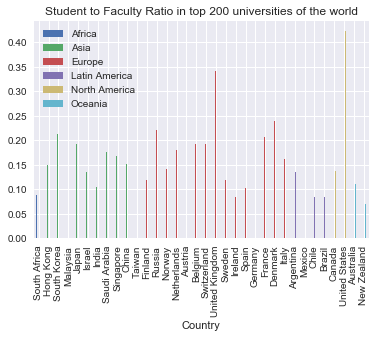

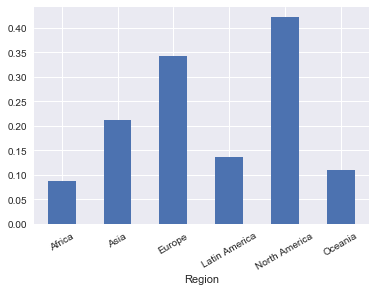

In [736]:
# Note: extra paranthesis () are necessary to allow inline comments 
# with functional-style calls in each line,i.e., .foo()

country_names = (DF_topuni_country_Fac_Std_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting)
        
A = (DF_topuni_country_Fac_Std_ratio[['country', 'region', 'Fac_Std_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='Fac_Std_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='Student to Faculty Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_topuni_region_Fac_Std_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='Fac_Std_ratio', legend=None, rot=30))

### Analysis
- 

## QS International Students to Total Students Ratio

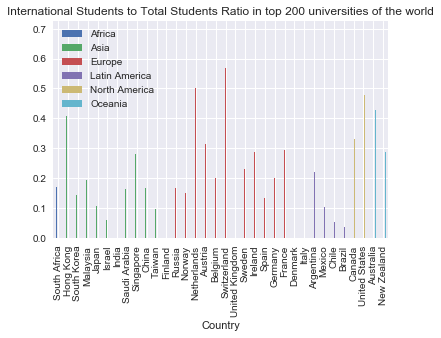

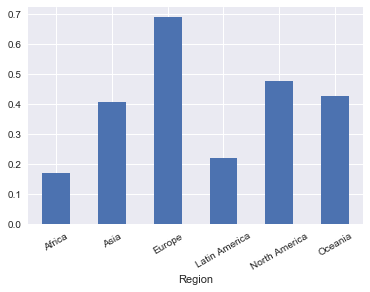

In [737]:
country_names = (DF_topuni_country_interStd_totalStd_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting
        
A = (DF_topuni_country_interStd_totalStd_ratio[['country', 'region', 'interStd_totalStd_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='interStd_totalStd_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='International Students to Total Students Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_topuni_region_interStd_totalStd_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='interStd_totalStd_ratio', legend=None, rot=30))

### Analysis
- 

- Answer the previous question aggregating the data by (c) country and (d) region.

# Times Higher Education (THE)

In [628]:
intercepted_json ='https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(intercepted_json)

In [656]:
raw_data = r.json()['data']
DF = pd.DataFrame.from_dict(raw_data)[:NUMOF_UNIVERSITIES]
# DF = DF.drop(['core_id', 'guide', 'nid', 'stars', 'logo', 'cc', 'score'], axis=1)
DF = DF[['location', 'name', 'rank', 'rank_order', 'stats_number_students', 'stats_pc_intl_students', 'stats_student_staff_ratio']]

In [669]:
# Renaming and adjusting features to match QS
DF_ = DF.rename(columns={'location':'country', 'name': 'title', 
                   'rank': 'rank_display', 'stats_number_students': 'total_std',
                   'stats_student_staff_ratio': 'Fac_Std_ratio', 'stats_pc_intl_students':'interStd_totalStd_ratio'})
DF_['interStd_totalStd_ratio'] = DF_['interStd_totalStd_ratio'].apply(lambda x: int(x[:-1])/float(100))
DF_['Fac_Std_ratio'] = DF_['Fac_Std_ratio'].apply(lambda x: 1/float(x))
DF_['total_std'] = DF_['total_std'].apply(lambda x: int(x.replace(',', '')))

DF_

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio
0,United Kingdom,University of Oxford,1,10,20409,0.38,0.089286
1,United Kingdom,University of Cambridge,2,20,18389,0.35,0.091743
2,United States,California Institute of Technology,=3,30,2209,0.27,0.153846
3,United States,Stanford University,=3,40,15845,0.22,0.133333
4,United States,Massachusetts Institute of Technology,5,50,11177,0.34,0.114943
5,United States,Harvard University,6,60,20326,0.26,0.112360
6,United States,Princeton University,7,70,7955,0.24,0.120482
7,United Kingdom,Imperial College London,8,80,15857,0.55,0.087719
8,United States,University of Chicago,9,90,13525,0.25,0.161290
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,19233,0.38,0.068493


In [688]:
from warnings import warn

def find_location(x):
    try:
        return country2region[x] # this mapping was extracted from QS
    except KeyError:
        warn("\nThe mapping for {} does not exist!\n".format(x))
        return np.nan
    
DF_['region'] = DF_['country'].apply(lambda x: find_location(x))

/Users/mohammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: 
The mapping for Luxembourg does not exist!

  import sys
/Users/mohammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: 
The mapping for Russian Federation does not exist!

  import sys


We observe that the mapping for Luxembourg and Russian Federation does not exist. So we add them manually (as advised in the FAQ):

## THE Final File

In [693]:
country2region['Russian Federation'] = 'Europe'
country2region['Luxembourg'] = 'Europe'
DF_['region'] = DF_['country'].apply(lambda x: find_location(x))
DF_THE = DF_
DF_

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
0,United Kingdom,University of Oxford,1,10,20409,0.38,0.089286,Europe
1,United Kingdom,University of Cambridge,2,20,18389,0.35,0.091743,Europe
2,United States,California Institute of Technology,=3,30,2209,0.27,0.153846,North America
3,United States,Stanford University,=3,40,15845,0.22,0.133333,North America
4,United States,Massachusetts Institute of Technology,5,50,11177,0.34,0.114943,North America
5,United States,Harvard University,6,60,20326,0.26,0.112360,North America
6,United States,Princeton University,7,70,7955,0.24,0.120482,North America
7,United Kingdom,Imperial College London,8,80,15857,0.55,0.087719,Europe
8,United States,University of Chicago,9,90,13525,0.25,0.161290,North America
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,19233,0.38,0.068493,Europe


## THE Aggregated by Country

c-1) [Aggregated by 'country'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [694]:
DF_THE_country_Fac_Std_ratio = DF_THE.iloc[DF_THE.groupby('country')['Fac_Std_ratio'].idxmax()]
DF_THE_country_Fac_Std_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
47,Australia,Australian National University,48,480,15986,0.35,0.051813,Oceania
164,Austria,University of Vienna,=165,1650,35375,0.26,0.048077,Europe
106,Belgium,Ghent University,107,1070,35909,0.10,0.027855,Europe
41,Canada,McGill University,42,420,30940,0.26,0.075188,North America
131,China,University of Science and Technology of China,132,1320,16032,0.03,0.121951,Asia
109,Denmark,University of Copenhagen,=109,1100,30395,0.14,0.243902,Europe
89,Finland,University of Helsinki,90,900,22532,0.06,0.061728,Europe
114,France,École Polytechnique,115,1150,2799,0.36,0.196078,Europe
34,Germany,LMU Munich,=34,350,36091,0.15,0.064103,Europe
119,Hong Kong,City University of Hong Kong,=119,1200,9240,0.35,0.089286,Asia


c-1) [Aggregated by 'country'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [695]:
DF_THE_country_interStd_totalStd_ratio = DF_THE.iloc[DF_THE.groupby('country')['interStd_totalStd_ratio'].idxmax()]
DF_THE_country_interStd_totalStd_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
31,Australia,University of Melbourne,32,320,42116,0.40,0.037594,Oceania
164,Austria,University of Vienna,=165,1650,35375,0.26,0.048077,Europe
174,Belgium,Université Libre de Bruxelles,=175,1750,25343,0.35,0.023041,Europe
33,Canada,University of British Columbia,=34,340,51889,0.29,0.055249,North America
28,China,Peking University,=27,290,42136,0.16,0.112360,Asia
152,Denmark,Technical University of Denmark,=153,1530,8548,0.24,0.166667,Europe
189,Finland,Aalto University,190,1900,12744,0.20,0.049505,Europe
114,France,École Polytechnique,115,1150,2799,0.36,0.196078,Europe
40,Germany,Technical University of Munich,41,410,38689,0.23,0.018382,Europe
39,Hong Kong,University of Hong Kong,40,400,18364,0.42,0.055556,Asia


## THE Aggregated by Region

c-1) [Aggregated by 'region'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [696]:
DF_THE_region_Fac_Std_ratio = DF_THE.iloc[DF_THE.groupby('region')['Fac_Std_ratio'].idxmax()]
DF_THE_region_Fac_Std_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
170,South Africa,University of Cape Town,171,1710,20775,0.18,0.085470,Africa
45,Japan,University of Tokyo,46,460,26000,0.10,0.149254,Asia
109,Denmark,University of Copenhagen,=109,1100,30395,0.14,0.243902,Europe
105,United States,Vanderbilt University,=105,1060,12011,0.13,0.303030,North America
191,New Zealand,University of Auckland,192,1920,30348,0.29,0.053191,Oceania


c-1) [Aggregated by 'region'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [697]:
DF_THE_region_interStd_totalStd_ratio = DF_THE.iloc[DF_THE.groupby('region')['interStd_totalStd_ratio'].idxmax()]
DF_THE_region_interStd_totalStd_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
170,South Africa,University of Cape Town,171,1710,20775,0.18,0.085470,Africa
39,Hong Kong,University of Hong Kong,40,400,18364,0.42,0.055556,Asia
24,United Kingdom,London School of Economics and Political Science,=25,250,10065,0.71,0.081967,Europe
23,United States,Carnegie Mellon University,24,240,12676,0.45,0.074074,North America
31,Australia,University of Melbourne,32,320,42116,0.40,0.037594,Oceania


# THE Plots

Plot your data using bar charts and describe briefly what you observed.

## THE Student to Faculty Ratio

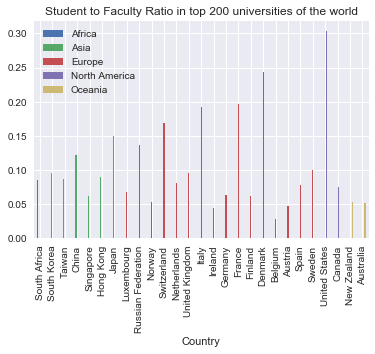

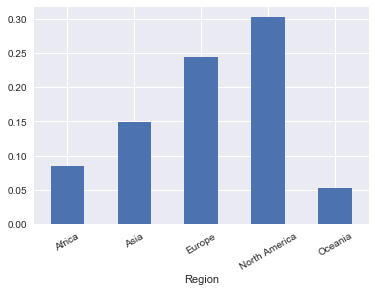

In [698]:
# Note: extra paranthesis () are necessary to allow inline comments 
# with functional-style calls in each line,i.e., .foo()

country_names = (DF_THE_country_Fac_Std_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting)
        
A = (DF_THE_country_Fac_Std_ratio[['country', 'region', 'Fac_Std_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='Fac_Std_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='Student to Faculty Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_THE_region_Fac_Std_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='Fac_Std_ratio', legend=None, rot=30))

### Analysis
- 

## THE International Students to Total Students Ratio

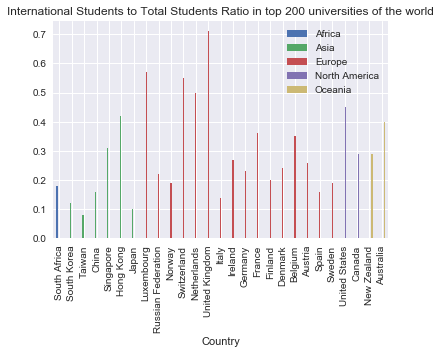

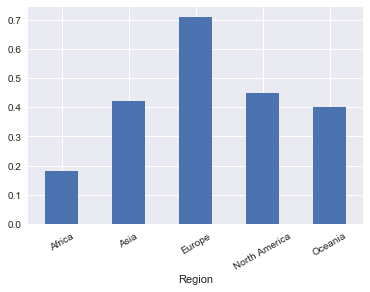

In [699]:
country_names = (DF_THE_country_interStd_totalStd_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting
        
A = (DF_THE_country_interStd_totalStd_ratio[['country', 'region', 'interStd_totalStd_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='interStd_totalStd_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='International Students to Total Students Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_THE_region_interStd_totalStd_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='interStd_totalStd_ratio', legend=None, rot=30))

### Analysis
- 

# 

# Merging two Data Sets

 "3". Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

In [750]:
def get_closest_match(left_df, right_df, right_df_matching_column_name):
    # gets the closest matching between the left_df and right_df on the column name specified. 
    import difflib
    result = difflib.get_close_matches(left_df, 
                                       right_df[right_df_matching_column_name], 
                                       n=1) # the default threshold is 60% similarity.
    try:
        return result[0]
    except IndexError:
        return np.nan

DF_topuni_ = DF_topuni.copy(deep=True).reset_index() # by reseting the index, we add another column (to keep track 
                                                     #  of  things after merging.)
DF_THE_ = DF_THE.copy(deep=True).reset_index()

DF_topuni_['matched_title'] = DF_topuni_['title'].apply(lambda x: get_closest_match(x, DF_THE_, 'title'))
DF_merged = DF_THE_.merge(DF_topuni_, left_on='title', right_on='matched_title', suffixes=['_THE', '_QS'] )

# we reorder columns for better comparison purposes.
DF_merged = DF_merged.reindex_axis(['index_THE', 'index_QS', 'country_THE', 'country_QS', 'title_THE', 'title_QS', 'rank_display_THE', 'rank_display_QS',
                     'total_std_THE', 'total_std_QS', 'interStd_totalStd_ratio_THE', 'interStd_totalStd_ratio_QS', 
                    'Fac_Std_ratio_THE', 'Fac_Std_ratio_QS', 'region_THE', 'region_QS', 'inter_std', 'inter_fac', 
                     'total_fac','matched_title', 'rank_order'], axis=1)

DF_merged

,index_THE,index_QS,country_THE,country_QS,title_THE,title_QS,rank_display_THE,rank_display_QS,total_std_THE,total_std_QS,...,interStd_totalStd_ratio_QS,Fac_Std_ratio_THE,Fac_Std_ratio_QS,region_THE,region_QS,inter_std,inter_fac,total_fac,matched_title,rank_order
0,0,5,United Kingdom,United Kingdom,University of Oxford,University of Oxford,1,6,20409,19720.0,...,0.372870,0.089286,0.342292,Europe,Europe,7353.0,2964.0,6750.0,University of Oxford,10
1,1,4,United Kingdom,United Kingdom,University of Cambridge,University of Cambridge,2,5,18389,18770.0,...,0.356899,0.091743,0.292488,Europe,Europe,6699.0,2278.0,5490.0,University of Cambridge,20
2,2,3,United States,United States,California Institute of Technology,California Institute of Technology (Caltech),=3,4,2209,2255.0,...,0.286918,0.153846,0.422616,North America,North America,647.0,350.0,953.0,California Institute of Technology,30
3,3,1,United States,United States,Stanford University,Stanford University,=3,2,15845,15878.0,...,0.227422,0.133333,0.269870,North America,North America,3611.0,2042.0,4285.0,Stanford University,40
4,4,0,United States,United States,Massachusetts Institute of Technology,Massachusetts Institute of Technology (MIT),5,1,11177,11067.0,...,0.335863,0.114943,0.269450,North America,North America,3717.0,1679.0,2982.0,Massachusetts Institute of Technology,50
5,5,2,United States,United States,Harvard University,Harvard University,6,3,20326,22429.0,...,0.234785,0.112360,0.193945,North America,North America,5266.0,1311.0,4350.0,Harvard University,60
6,5,122,United States,Japan,Harvard University,Hokkaido University,6,=122,20326,17552.0,...,0.076743,0.112360,0.148416,North America,Asia,1347.0,210.0,2605.0,Harvard University,60
7,6,12,United States,United States,Princeton University,Princeton University,7,13,7955,8069.0,...,0.222208,0.120482,0.124799,North America,North America,1793.0,246.0,1007.0,Princeton University,70
8,7,7,United Kingdom,United Kingdom,Imperial College London,Imperial College London,8,8,15857,16090.0,...,0.543567,0.087719,0.244251,Europe,Europe,8746.0,2071.0,3930.0,Imperial College London,80
9,8,8,United States,United States,University of Chicago,University of Chicago,9,9,13525,13557.0,...,0.249244,0.161290,0.180645,North America,North America,3379.0,635.0,2449.0,University of Chicago,90
